In [15]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
import pathlib
data_dir = pathlib.Path(".\\Dataset")
data_dir

WindowsPath('Dataset')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('Dataset/Balushahi/balushahi_100.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_121.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_122.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_123.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_124.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2454


In [19]:
Balushahi = list(data_dir.glob('Balushahi/*'))
Balushahi[:5]

[WindowsPath('Dataset/Balushahi/balushahi_100.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_121.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_122.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_123.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_124.jpg')]

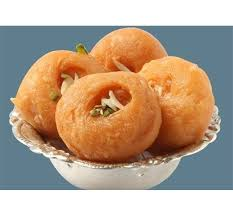

In [20]:
Image.open(str(Balushahi[1]))

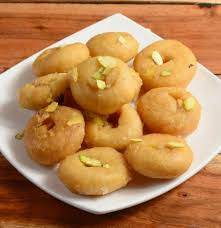

In [21]:
Image.open(str(Balushahi[2]))

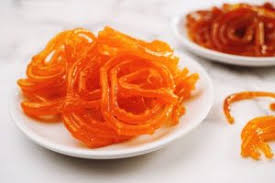

In [22]:
Jalebi = list(data_dir.glob('Jalebi/*'))
Image.open(str(Jalebi[0]))

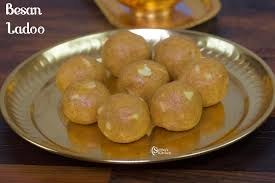

In [23]:
Besan_ke_Laddu = list(data_dir.glob('Besan ke Laddu/*'))
Image.open(str(Besan_ke_Laddu[0]))

In [24]:
sweet_images_dict = {
    'Balushahi': list(data_dir.glob('Balushahi/*')),
    'Besan_ke_Laddu': list(data_dir.glob('Besan ke Laddu/*')),
    'Jalebi': list(data_dir.glob('Jalebi/*')),
    'Kaju_Katli': list(data_dir.glob('Kaju Katli/*')),
    'Modak': list(data_dir.glob('Modak/*')),
    'Peda': list(data_dir.glob('Peda/*')),
    'Rasgulla': list(data_dir.glob('Rasgulla/*')),
    'Rasmalai': list(data_dir.glob('Rasmalai/*')),
    'Soan_Papdi': list(data_dir.glob('Soan Papdi/*')),
}

In [25]:
sweet_label_dict = {
    'Balushahi': 0,
    'Besan_ke_Laddu': 1,
    'Jalebi': 2,
    'Kaju_Katli': 3,
    'Modak': 4,
    'Peda': 5,
    'Rasgulla': 6,
    'Rasmalai': 7,
    'Soan_Papdi': 8,
}

In [26]:
sweet_images_dict['Balushahi'][:5]

[WindowsPath('Dataset/Balushahi/balushahi_100.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_121.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_122.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_123.jpg'),
 WindowsPath('Dataset/Balushahi/balushahi_124.jpg')]

In [27]:
str(sweet_images_dict['Balushahi'][0])

'Dataset\\Balushahi\\balushahi_100.jpg'

In [28]:
img = cv2.imread(str(sweet_images_dict['Balushahi'][0]))

In [29]:
img.shape

(168, 300, 3)

In [30]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [31]:
X, y = [], []

for sweet_name, images in sweet_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(sweet_label_dict[sweet_name])

In [32]:
len(X)

2454

In [33]:
len(y)

2454

In [34]:
X = np.array(X)
y = np.array(y)

# Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
  tf.keras.layers.Dense(num_classes)
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [40]:
model.fit(X_train_scaled, y_train, epochs=10,validation_data=(X_test_scaled, y_test))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 470ms/step - acc: 0.9421 - loss: 0.2655 - val_acc: 0.7394 - val_loss: 0.7868
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 451ms/step - acc: 0.9620 - loss: 0.2263 - val_acc: 0.7345 - val_loss: 0.7776
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 454ms/step - acc: 0.9621 - loss: 0.2165 - val_acc: 0.7345 - val_loss: 0.7915
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 458ms/step - acc: 0.9626 - loss: 0.2073 - val_acc: 0.7524 - val_loss: 0.7793
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 448ms/step - acc: 0.9713 - loss: 0.1792 - val_acc: 0.7427 - val_loss: 0.8033
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - acc: 0.9847 - loss: 0.1624 - val_acc: 0.7329 - val_loss: 0.8030
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - acc: 0.9836 - loss: 0.1529 - val_acc: 0.7427 - val_loss: 0.8125
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - acc: 0.9891 - loss: 0.1368 - val_acc: 0.7427 - val_loss: 0.8081
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 448ms/

After training the model for 10 epochs, I achieved a training accuracy of 93% and a test accuracy of 74%. However, it appears that my model is overfitting. Therefore, I am considering implementing data augmentation techniques to address this issue.


In [41]:
model.save("sweet_classification_model.h5")

# Training the model with some data augmentation

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # set range for random shear
    zoom_range=0.2,  # set range for random zoom
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,  # randomly flip images
    fill_mode='nearest'  # strategy used for filling in newly created pixels
)

In [30]:
# No data augmentation for validation data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [31]:
# Prepare data generators
train_generator = train_datagen.flow(X_train_scaled, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test_scaled, y_test, batch_size=32)

In [32]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
  tf.keras.layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 39s 582ms/step - accuracy: 0.3179 - loss: 1.9870 - val_accuracy: 0.6010 - val_loss: 1.1945
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 565ms/step - accuracy: 0.6138 - loss: 1.1411 - val_accuracy: 0.6645 - val_loss: 1.0274
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 564ms/step - accuracy: 0.6828 - loss: 0.9777 - val_accuracy: 0.6971 - val_loss: 0.9657
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 565ms/step - accuracy: 0.7157 - loss: 0.8431 - val_accuracy: 0.6906 - val_loss: 0.9526
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 563ms/step - accuracy: 0.7166 - loss: 0.8318 - val_accuracy: 0.7020 - val_loss: 0.8790
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 564ms/step - accuracy: 0.7580 - loss: 0.7485 - val_accuracy: 0.7199 - val_loss: 0.8726
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 570ms/step - accuracy: 0.7801 - loss: 0.6567 - val_accuracy: 0.7101 - val_loss: 0.8407
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 596ms/step - accuracy: 0.7663 - loss: 0.6450 - val_accu

After Aplying data augmentation the traing accuracy and validation accuracy look closer than prvious one so in next step 
fine-tune the feature extractor layer (MobileNetV2) by unfreezing some of its layers,

# fine-tune the feature extractor layer (MobileNetV2) 

In [33]:
# Load MobileNetV2 feature extractor
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=True  # Unfreeze the feature extractor layer for fine-tuning
)

In [35]:
# num_classes = 9

# # Build model architecture
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
#     tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)), # Add the feature extractor layer
#     tf.keras.layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
#     tf.keras.layers.Dense(num_classes, activation='softmax')  # Add a dense layer for classification
# ])

In [37]:
# Build model architecture with adjusted dropout rate
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Add the feature extractor layer
    tf.keras.layers.Dropout(0.3),  # Adjust dropout rate to 0.3
    tf.keras.layers.Dense(512, activation='relu'),  # Add a dense layer with 512 units
    tf.keras.layers.Dropout(0.3),  # Add another dropout layer with dropout rate 0.3
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Add a dense layer for classification
])


In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660,489 (2.52 MB)

 Trainable params: 660,489 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [44]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 579ms/step - accuracy: 0.6009 - loss: 1.1681 - val_accuracy: 0.7134 - val_loss: 0.8537
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 570ms/step - accuracy: 0.6668 - loss: 0.9836 - val_accuracy: 0.6987 - val_loss: 0.9061
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 572ms/step - accuracy: 0.6928 - loss: 0.9189 - val_accuracy: 0.7248 - val_loss: 0.8370
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 611ms/step - accuracy: 0.7006 - loss: 0.8859 - val_accuracy: 0.7052 - val_loss: 0.8789
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 606ms/step - accuracy: 0.7094 - loss: 0.8104 - val_accuracy: 0.7248 - val_loss: 0.8453
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 597ms/step - accuracy: 0.7251 - loss: 0.7801 - val_accuracy: 0.7394 - val_loss: 0.7828
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 581ms/step - accuracy: 0.7558 - loss: 0.7011 - val_accuracy: 0.7378 - val_loss: 0.7935
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 573ms/step - accuracy: 0.7521 - loss: 0.7139 - 

still I am not getting much accuracy but overfitting problem has been solved 

In [50]:
model.save("sweet_classification_model.h5")

# Implementing hyperparameter tuning using Keras Tuner's RandomSearch:

In [30]:
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

C:\Users\vishw\AppData\Local\Temp\ipykernel_13460\661479311.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [31]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    mobilenet_v2,
    input_shape=(224, 224, 3),
    trainable=False
)

In [32]:
# Define number of output classes
num_classes = 9

# Define data augmentation generators
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [33]:
# Define function to build model for hyperparameter tuning
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Add the feature extractor layer
        tf.keras.layers.Dropout(0.3),  # Adjust dropout rate to 0.3
        tf.keras.layers.Dense(512, activation='relu'),  # Add a dense layer with 512 units
        tf.keras.layers.Dropout(0.3),  # Add another dropout layer with dropout rate 0.3
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

In [34]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  
    executions_per_trial=3,  
    directory='hyperparameter_tuning',
    project_name='sweet_classification')

In [35]:
tuner.search(datagen.flow(train_generator, y_train), epochs=10, validation_data=(validation_generator, y_test))

KeyboardInterrupt: 